# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Monday) 11:00 pm </b> </font>

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
$

# Introduction

This assignment is to do build a linear model for  linear regression on the bike data set which contains the hourly count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
    In this assignment I am using Least square method (batch training)and least mean square method (Online training) to build the linear model. 

# Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0. 

# Description

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

dataset contains the hourly count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. Source : https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [741]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#reading of the data
df= pd.read_csv("hour.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [742]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [744]:
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [745]:
df.tail(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


# Preprocessing of the data

In [746]:
pd.isnull(df)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [747]:
np.any(df.isnull())

False

dropping date field because day, month and year are already there as columns. dropping casual and registered because cnt columns is sum of casual and registered columns dropping instant column There is no null values present in the dataset. So no need to perfom any imputing of null values. All coloumn values present are numeric values.so no need to perform any preprocessing method to convert non numeric values.

In [748]:
X=df
X=X.drop(['dteday','instant','casual','registered'],axis=1)
X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14


# Plots for understanding or analysis

Histogram, Pie chart and bar graph are used here to understand the data better. 

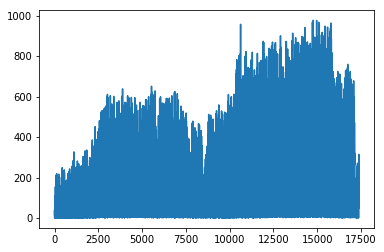

In [749]:
plt.plot(df.loc[:, 'cnt'])

(array([ 6972.,  3705.,  2659.,  1660.,   987.,   663.,   369.,   188.,
          139.,    37.]),
 array([   1. ,   98.6,  196.2,  293.8,  391.4,  489. ,  586.6,  684.2,
         781.8,  879.4,  977. ]),
 <a list of 10 Patch objects>)

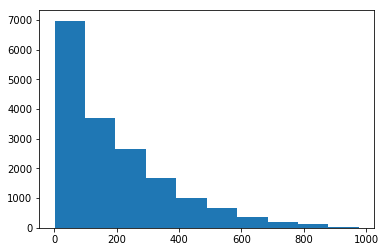

In [750]:
plt.hist(df.loc[:, 'cnt'])

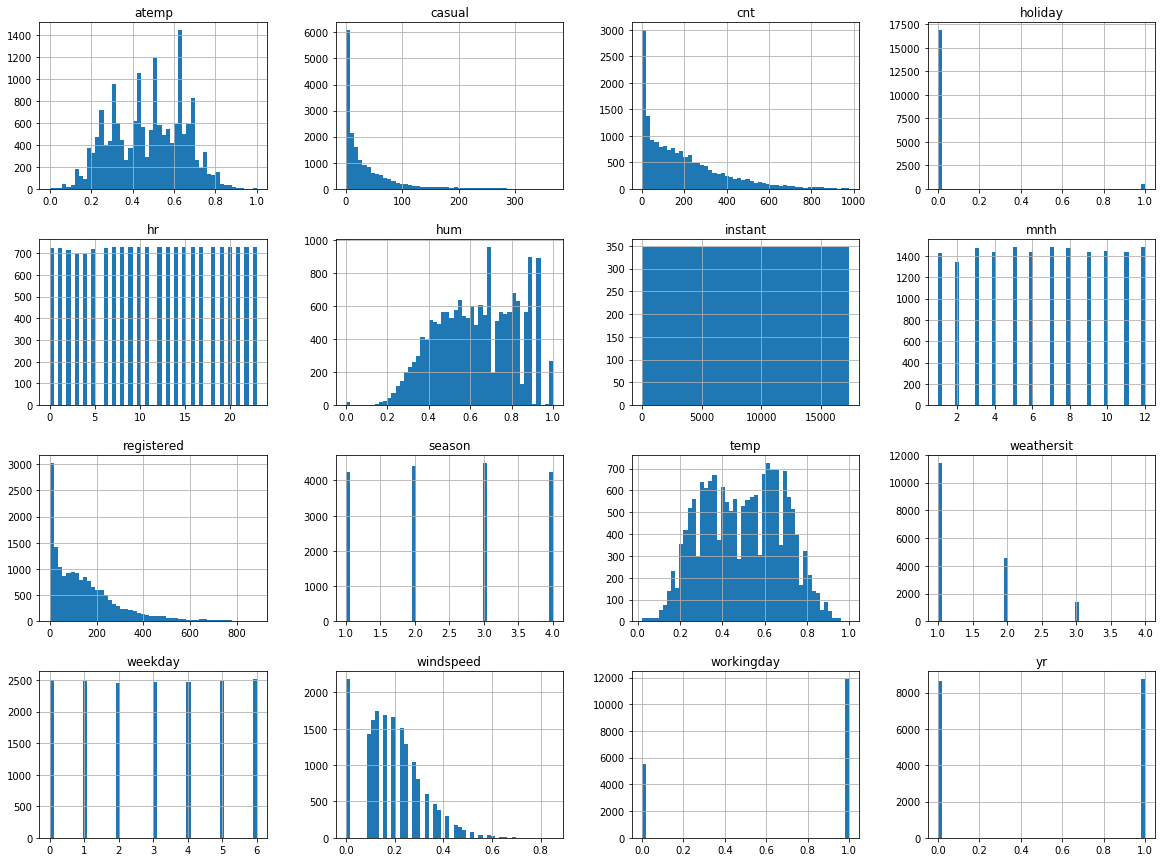

In [751]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [752]:
Feature = X.iloc[:, :-1].copy()
Feature

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000
7,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000
8,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000
9,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000


In [753]:
Y=X.loc[:, 'cnt'].copy()

In [754]:
Feature.shape

(17379, 12)

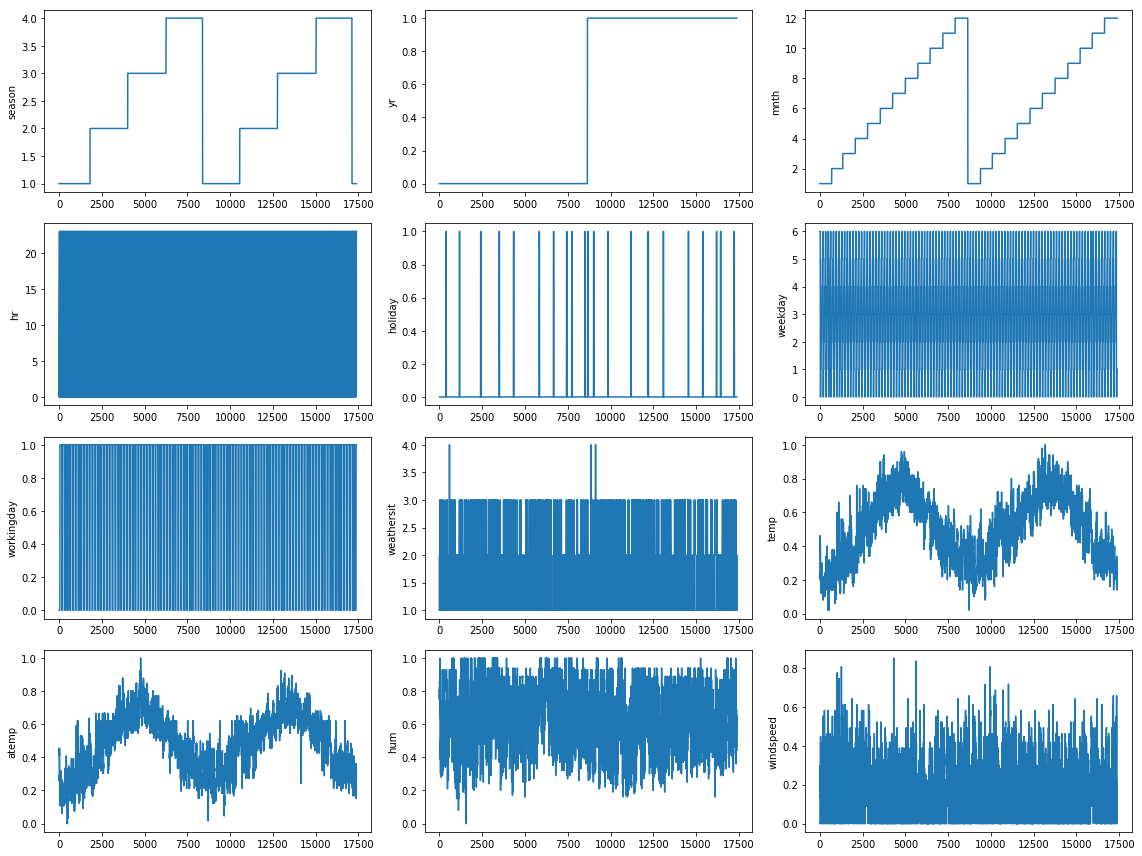

In [755]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.plot(Feature.iloc[:, i])
    plt.ylabel(Feature.columns.values[i])
fig.tight_layout()

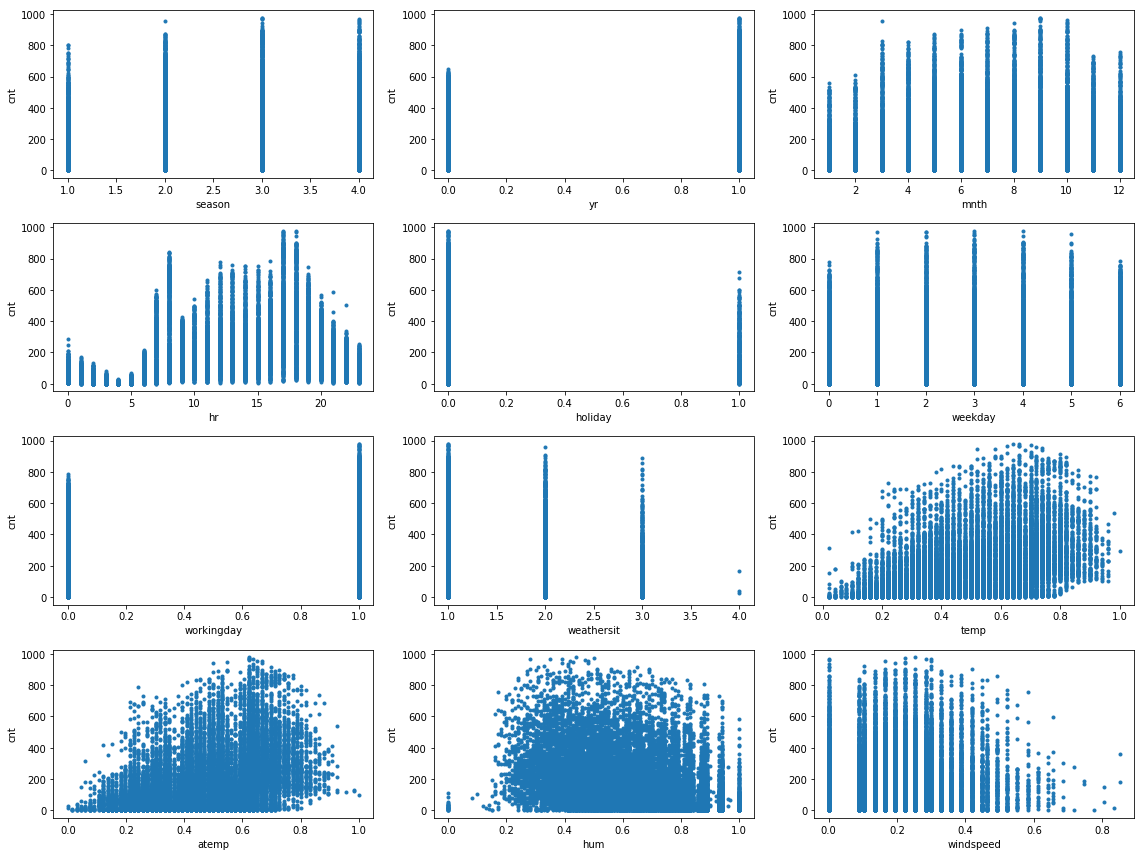

In [756]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.plot(Feature.iloc[:, i], Y, '.')
    plt.xlabel(Feature.columns.values[i])
    plt.ylabel('cnt')

fig.tight_layout()

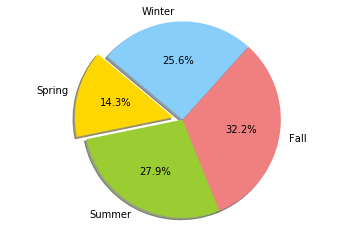

In [757]:
count_by_season = df.groupby(['season'])['cnt'].sum()
count_by_season
# Data to plot
labels = 'Spring', 'Summer', 'Fall', 'Winter'
sizes = count_by_season
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

From the pie chart, we can see that more nuber of bike got rented during fall and less number in spring

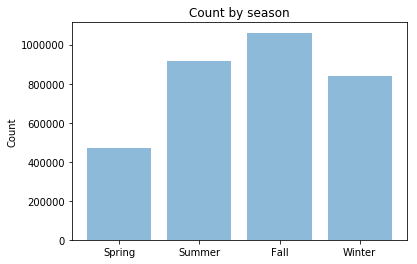

In [758]:
objects = ('Spring', 'Summer','Fall', 'Winter')
y_pos = np.arange(len(objects)) 
plt.bar(y_pos, count_by_season, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Count by season')
 
plt.show()

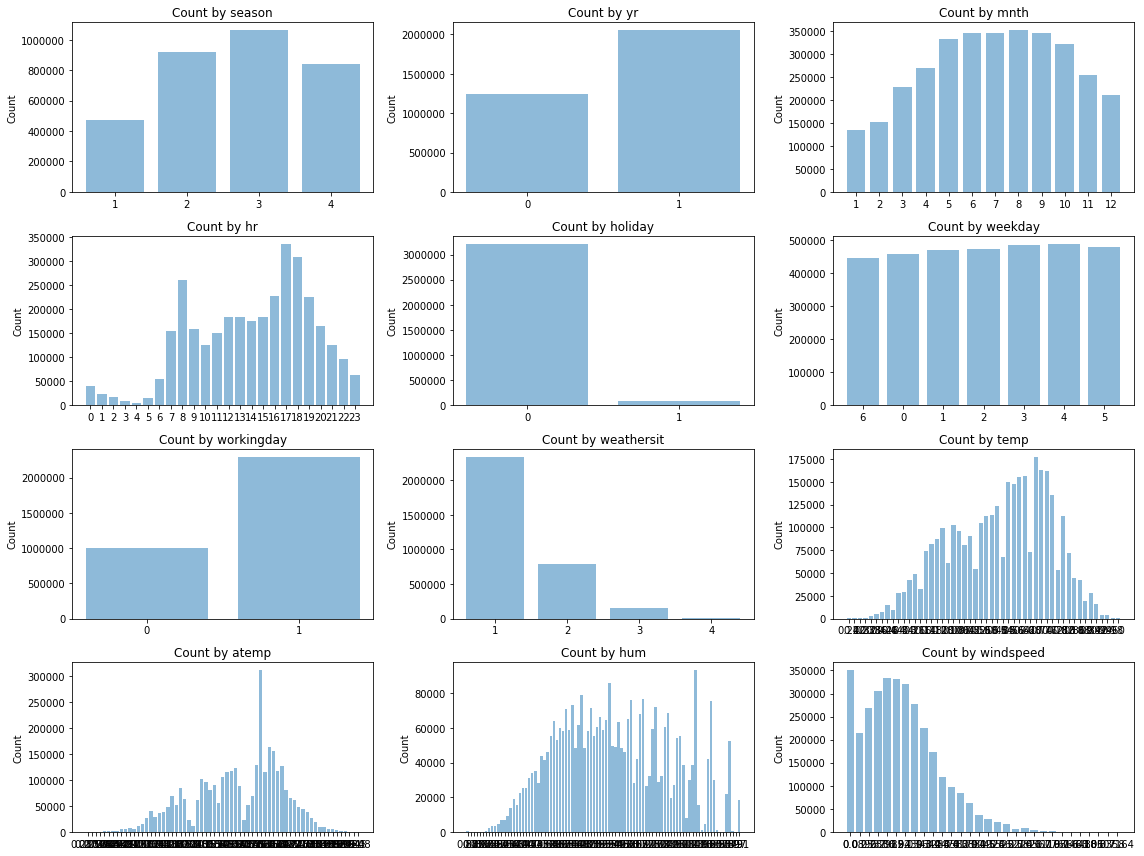

In [759]:
fig = plt.figure(figsize=(16,12))
plt.clf()
names=Feature.columns.values
j=0;
for i in names:
    countbycol=df.groupby(i)['cnt'].sum()
    plt.subplot(4, 3, j+1)
    objects=df[i].unique()
    y_pos = np.arange(len(objects)) 
    plt.bar(y_pos, countbycol, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Count')
    plt.title('Count by '+i)
    j=j+1;
fig.tight_layout() 



 from the bar graph between count by year and count , we can see that the bike trending is increased in 2012.

# Preliminary Observation

From the pie chart which I plot between season and count, we can see that more nuber of bike got rented during fall and less number in spring. from the bar graph between count by year and count , we can see that the bike trending is increased in 2012.

Count by month bar graph shows bike renting count is less during December, January and Febrauary. Count by hour graph shows the bike renting is most during Morning and evening. Count by weekday shows almost similar trend in bike renting. Count by weather graph, if the weather is Clear, Few clouds, Partly cloud and Partly cloudy bike renting is high. Count by windspeed graph,shows if the windspeed is increasing the count of bike rent is decreasing.

# Data Preprocessing Continued

In [760]:
# T will be the actual target
T = Y.as_matrix()
T.shape

(17379,)

Converting the # Converting the values in 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit' to coloumns using one hot encdoing using pandas and dropping those columns also.

In [761]:
# Converting the values in 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit' to coloumns using one hot encdoing 
# using pandas
cols =['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit']
data_1 = Feature[cols]
for col in data_1.columns.tolist():
    data_1[col] = data_1[col].astype('category')
data_dummies = pd.get_dummies(data_1)

data_dummies
X = pd.concat([data_dummies, Feature], axis=1)
X=X.drop(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday','workingday', 'weathersit'],axis=1)
nX=X


C:\Users\Arun\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [762]:
nX=nX.as_matrix()
nX

array([[ 1.    ,  0.    ,  0.    , ...,  0.2879,  0.81  ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.2727,  0.8   ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ...,  0.2727,  0.8   ,  0.    ],
       ..., 
       [ 1.    ,  0.    ,  0.    , ...,  0.2576,  0.6   ,  0.1642],
       [ 1.    ,  0.    ,  0.    , ...,  0.2727,  0.56  ,  0.1343],
       [ 1.    ,  0.    ,  0.    , ...,  0.2727,  0.65  ,  0.1343]])

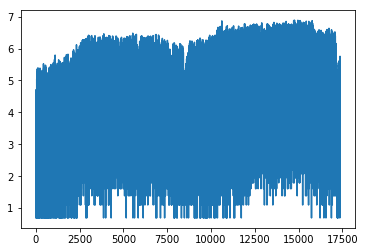

In [763]:
Tlog = np.log(T + 1)
plt.plot(Tlog)

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


# review of the linear models

Here we are building linear model using least sqaure and least mean sqaure method. 
In least square method the w which reduce the cost is calculated as below



## Least Squares

The parameter that gives best fit will be

$$
\wv^* = \arg\min_\wv \sum_{i=1}{N} \Big( f(\xv_i; \wv) - t_i \Big)^2
$$

Since the error funciton is quadratic, the problem can be analytically solved by simply setting derivative with respect to $\wv$ to zero. 
For this, let us prepare data in matrix. 
The target values are collected in matrix $\Tm$, and the input samples are in matrix $\Xm$.

$$
\begin{align}
\Tm &= [t_1, t_2, \cdots, t_N]^\top \\ 
\\
\wv &= [w_0, w_1, \cdots, w_D]^\top \\
\\
\Xm &= \begin{bmatrix}
    x_{10} & x_{11} & x_{12} & \dots  & x_{1D} \\
    x_{20} & x_{21} & x_{22} & \dots  & x_{2D} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{N0} & x_{d1} & x_{d2} & \dots  & x_{ND}
\end{bmatrix}
\end{align}
$$

With this matrix, $f(\xv; \wv)$ can be written in matrix form as:
$$
f(\xv; \wv) = \Xm \wv.
$$
Thus, the error function can be
$$
\begin{align}
E(\wv) &= \sum_{i=1}^N \Big(f(\xv_i; \wv_i) - t_i \Big)^2 \\
            \\
            &= (\Xm \wv - \Tm)^\top (\Xm \wv - \Tm) \\ 
            \\
            &= \wv^\top \Xm^\top \Xm \wv - 2 \Tm^\top \Xm \wv + \Tm^\top \Tm 
\end{align}
$$
because $\Tm^\top \Xm \wv$ is a scalar, so symmetric. 

Now, let us do the derivative. 
$$
\begin{align}
\frac{\partial E(\wv)}{\partial \wv} &= \frac{\partial (\Xm \wv - \Tm)^\top (\Xm \wv - \Tm)}{\partial \wv} \\
        \\
        &= \frac{\partial (\wv^\top \Xm^\top \Xm \wv - 2 \Tm^\top \Xm \wv + \Tm^\top \Tm )}{\partial \wv} \\
        \\
        &= \frac{\partial (\wv^\top \Xm^\top \Xm \wv)}{\partial \wv} - 2 \Xm^\top \Tm \\
        \\
        &= \Xm^\top \Xm \wv + (\Xm^\top \Xm)^\top \wv - 2 \Xm^\top \Tm  \\
        \\
        &= 2 \Xm^\top \Xm \wv - 2 \Xm^\top \Tm 
\end{align}
$$

Setting this to zero, 
$$
\begin{align}
 2 \Xm^\top \Xm \wv - 2 \Xm^\top \Tm  &= 0\\
\\
\Xm^\top \Xm \wv &= \Xm^\top \Tm\\
\\
\wv &= \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \Tm
\end{align}
$$



The main problem with Least square method is the fact that it uses the whole
training set to compute the gradient(w) at every step, which makes it very slow when
the training set is large. At the opposite extreme, Least mean square method(Stochastic Gradient Descent) just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster
since it has very little data to manipulate at every iteration. It also makes it possible to
train on huge training sets, since only one instance needs to be in memory at each
iteration (SGD can be implemented as an out-of-core algorithm.7)
Following is the way to calculate the w based on least mean square method

## Least Mean Squares (LMS)

Previously we observed that the least squares use all the available data for training or finding the best fit. 
This can be often computationally costly, especially with large data sets. When data is sufficiently large, we can consider *sequential* or *online* learning.
During the online learning process, we introduce a data point one by one, and update the parameters. Using the updated parameters, it makes a new estimation and repeat these steps. 

For this, we start with an initial guess $\wv$ and changes it as it reads more data until it converges. 
When $k$ represents the steps for the repetition,

$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \nabla E_k 
$$

where $E_k$ is the error for the $k$'th sample and $\alpha$ is a learning rate. 
This is called *stochastic gradient descent* or *sequential gradient descent*. 

For the $k$'th sample $\xv_k$, the gradient for the sum-of-squares error is

$$
\begin{align}
\nabla E_k = \frac{\partial E}{\partial \wv^{(k)}} &= \frac{\partial }{\partial \wv^{(k)}}\Big( f(\xv_k; \wv^{(k)}) - t_k \Big)^2 \\
        &= 2 \Big( f(\xv_k; \wv^{(k)}) - t_k \Big) \frac{\partial }{\partial \wv^{(k)}} \Big( f(\xv_k; \wv^{(k)}) - t_k \Big) \\
        &= 2 \Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \frac{\partial }{\partial \wv^{(k)}} \Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \\
        &= 2\Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \xv_k.
\end{align}
$$
This gives the following update rule for each sample:

$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \xv_k.
$$

### Super Classs Definition

In [764]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [765]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)        
    # train lease-squares model
    def train(self, X, T):
        X=self.add_ones(X)
        self.w= np.linalg.lstsq(X.T @ X,X.T @ T)[0] 

       # pass  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        return X @ self.w
        #pass  ## TODO: replace this with your codes

### Least Mean Squares

In [766]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        #self.w=np.random.rand(X.shape[1]+1)
        N=X.shape[1]+1
        self.w=np.zeros(N)
        for i in range(X.shape[0]):
               #self.w -= self.alpha * (self.w.T @ X[i] - T[i]) * X[i]
            self.train_step(X[i,:],T[i,:])
        #pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x=x.reshape(1,-1)
        x=self.add_ones(x)
        if(self.w is None):
            #self.w=np.random.rand(x.shape[1])
             self.w=np.zeros(x.shape[1])
            
        self.w=self.w.reshape(1,-1)
        y =  x @ self.w.T
        self.w -= self.alpha * (y - t) * x
        #self.w -= self.alpha * (self.w.T @ x - t)*x
        pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        X = self.add_ones(X)
        return X @ self.w.T
        #pass  ## TODO: replace this with your codes

# Explanation of codes

# Linear Regress
For implementing the least square method we are using a Linear Regress class which inherit the Linear model class. Linear regress class has train method and use method in addition to __init__ method. While creating an object of Linear regress, it is initializing the w to None using __init__ method which is calling the Linear model __init__method. 
train method in Linear regress is will add basis coloumn to X and it will find the w value using the equation mentioned in the review section of least sqaure.
Use method will return the predicted value by doing a dot product of passed X and w. here also we will basis column before doing the dot product.
# LMS
I am implementing the Least mean square method using a class called LMS which inherit from the Linear model. it has mainly three methods, train, train_step and use in addition to __init__method. in __init__method, it will intialize w to None using super class and initialize the alpha(learning rate) using passed learning rate argument. 

train method will initliaze the weight w with random value and for each row it will call train step method to find the w Stochastic Gradient Descent. train_step method will add basis columns after reshaping the x and it will find w using the equation mentioned in the review section of least mean square method. 
Use method will add basis column and predict the target value using w.


### Usage Examples

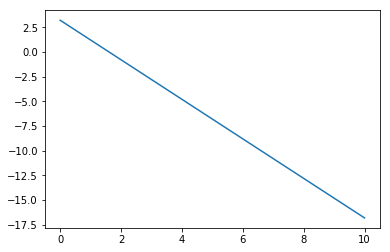

In [767]:
#least square
Xu = np.linspace(0,10, 11).reshape((-1, 1))
Tu = -2 * Xu + 3.2
lsu = LinearRegress()
lsu.train(Xu,Tu)
plt.plot(lsu.use(Xu))

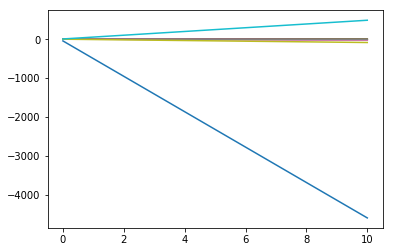

In [768]:
#least mean sqaure
lmsu = LMS(0.1)
for x, t in zip(Xu, Tu):
    lmsu.train_step(x, t)
    plt.plot(lmsu.use(Xu))

# Experiments


# if you are running experiments section after preliminary test, please run the code from start since I am using same variable as in preliminary test

# Descsription

In experiment section, I will apply the least sqaure method and least mean square method on the preprocessed bike sharing data set and build a linear model. I will find RMSE for each model and then we will compare the each method.

# Least square

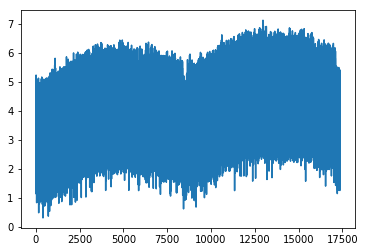

In [769]:
ls = LinearRegress()
#nXLs=ls.add_ones(nX)
ls.train(nX,Tlog)
#plt.plot(Tlog, 'ob')
plt.plot(ls.use(nX))

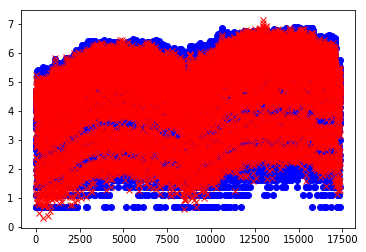

In [770]:
plt.plot(Tlog, 'ob')
plt.plot(ls.use(nX),'xr')

Above ones is the linear model created using least square method.

# Least mean square

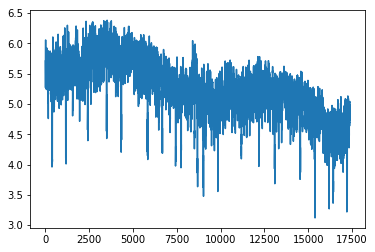

In [771]:
lms = LMS(0.0001)
for x, t in zip(nX, Tlog):
    lms.train_step(x, t)
plt.plot(lms.use(nX))


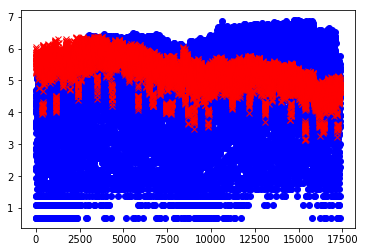

In [772]:
plt.plot(Tlog,'ob')
plt.plot(lms.use(nX),'xr')

# Analysis and comparison of algorithms


Here we can compare the model created by least square method and least mean square method by comparing the RMSE 

# Least square RMSE

In [773]:
np.sqrt(np.mean((Tlog- ls.use(nX))**2))

0.58775995188244312

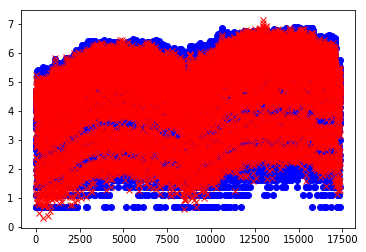

In [775]:
plt.plot(Tlog, 'ob')
plt.plot(ls.use(nX),'xr')

# Least mean square RMSE

In [774]:
np.sqrt(np.mean((Tlog- lms.use(nX))**2))

1.663317157145489

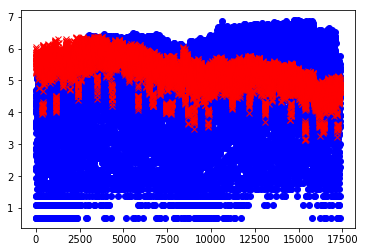

In [776]:
plt.plot(Tlog,'ob')
plt.plot(lms.use(nX),'xr')

From the above results we can see that RMSE for least mean square is higher than least square method. So linear model built using Least square is better compared to the once which built by least mean square.

From the graph also we can see the actual and predicted values are more overlapped in least square method than least mean square method. 

So based on RMSE and visualization, I would say least square method is better here than least mean square method.

I think for large set of data least mean square will take less time compared to the least square method. But since my dataset is not that large I am not able to see any difference.

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

I have learned how to implement the linear regrssion using least square method and least mean square method. Also I learned how 
to do the comparison of two models. Challenges I faced was to pass the preliminary test since I have to do some reshape and all to 
avoid the errros.

# References

In [ ]:
https://webpages.uncc.edu/mlee173/

# Extra Credit

If you want to work more for an extra credit, place your work here about weight analysis. 
Try to answer to the question: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? 
    
    

I am taking linear model built using the least square method. 


In [734]:
def train(X, T):
        XTest=np.hstack((np.ones((X.shape[0], 1)), X))
        w= np.linalg.lstsq(XTest.T @ XTest,XTest.T @ T)[0] 
        return w

In [735]:
wResult=train(nX,Tlog)
XTest=np.hstack((np.ones((nX.shape[0], 1)), nX))

wdf=pd.DataFrame(wResult)
wdf.max()

0    2.926519
dtype: float64

This is corresponds to Feature 'hr_17' . This is the most significant feature of my data

In [736]:
wdf.min()

0   -2.630697
dtype: float64

This corresponds to feature 'hr_4'. This is the least significant feature of my data

Trying to remove the least signficant feature from data 

0.58775995188244312

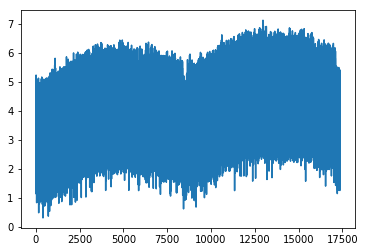

In [737]:
nX=X.drop(['hr_4'],axis=1)
lsnew1 = LinearRegress()
#nXLs=ls.add_ones(nX)
lsnew1.train(nX,Tlog)
#plt.plot(Tlog, 'ob')
plt.plot(lsnew1.use(nX))
np.sqrt(np.mean((Tlog- lsnew1.use(nX))**2))

0.58775995188244312

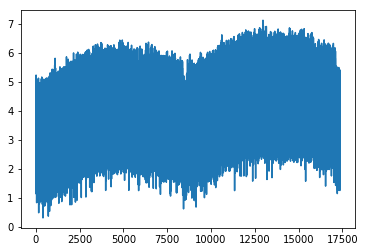

In [738]:
nX=X.drop(['hr_17'],axis=1)
lsnew2 = LinearRegress()
#nXLs=ls.add_ones(nX)
lsnew2.train(nX,Tlog)
#plt.plot(Tlog, 'ob')
plt.plot(lsnew2.use(nX))
np.sqrt(np.mean((Tlog- lsnew2.use(nX))**2))

0.79898970833116467

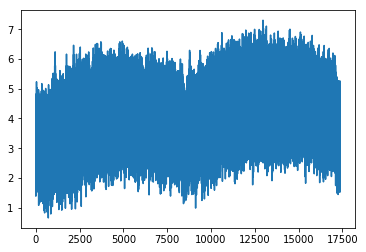

In [739]:
nX=X.drop(['hr_17','hr_4'],axis=1)
lsnew3 = LinearRegress()
#nXLs=ls.add_ones(nX)
lsnew3.train(nX,Tlog)
#plt.plot(Tlog, 'ob')
plt.plot(lsnew3.use(nX))
np.sqrt(np.mean((Tlog- lsnew3.use(nX))**2))

We can see that there is an increase in RMSE when we remove least and significant feature from model.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

In [777]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
